In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from astropy.constants import m_p, M_sun
import astropy.units as u
import matplotlib as mpl
import seaborn as sns
import astropy.units as u

sys.path.append('../pipeline_scripts/')
from pipeline_main_nosink import pipeline_nosink
from pipeline_2D_nosink import to_osyris_ivs
from pipeline_main import sink_positions, serialize_directory, sinks, true_sinks, pipeline

core_data = {}
initial_sn = [158, 222, 176, 212, 235, 341, 401, 403, 445]

# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 20}
mpl.rc('font', **font)

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.minor.size'] = 4

save_folder = '/groups/astro/kxm508/codes/python_dispatch/graphics/'

first_sink_snap = [159, 223, 177, 213, 236, 342, 402, 404, 446]

colors = sns.color_palette('colorblind', n_colors=9)

markers = ['o', 's', 'd', '^', 'v', '<', '>', 'p', 'P']

In [2]:
plot_data = serialize_directory(filename = 'sink13fmr05area_contribution.pkl', store = False)

In [16]:
time = plot_data['time']
snaps = [key for key in plot_data.keys()][:-1]
pct = [50, 75, 90]

In [23]:
plot_data[225]

{50: 11.416410138282727, 75: 25.7777045976327, 90: 42.099084158573135}

In [25]:
assert plot_data[223][50]

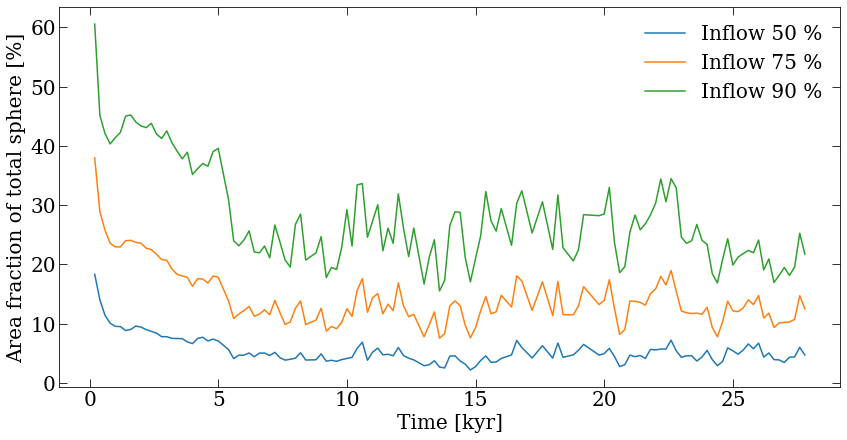

In [37]:
fig, axs = plt.subplots(figsize = (14, 7))

axs.set(xlabel = 'Time [kyr]', ylabel = 'Area fraction of total sphere [%]')

for p in pct:
    axs.plot([time[i] * 1e-3 for i, sn in enumerate(snaps) if  p in plot_data[sn]],
             np.array([plot_data[sn][p] for sn in snaps if p in plot_data[sn]]), '-', label = f'Inflow {p} %')

plt.legend(frameon = False)